In [1]:
import os
import numpy as np
from nilearn import image, plotting
import nibabel as nb
from functions import extract_samples, convert_samples_to_features_perfold, edit_events_full

In [2]:
data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
derivatives_dir = os.path.join(data_root, 'derivatives')

fmriprep_dir =         os.path.join(derivatives_dir, 'fmriprep23') # fmriprep output
func_dir =             os.path.join(derivatives_dir, 'func_clean') # cleaned bold images
stab_mask_dir =        os.path.join(derivatives_dir, 'mvpa_09_stabilityperfold_bold', 'stab_full_masks')    # for stability masks
output_feat_full_dir = os.path.join(derivatives_dir, 'mvpa_09_stabilityperfold_bold', 'features_full') # for full features

# Test on a subject

In [3]:
subject = '05'
ff = 0

In [5]:
stab_mask_data = np.load(os.path.join(stab_mask_dir, f'sub-{subject}_fold-{ff}_STAB.npy'))
example_func = nb.load(os.path.join(func_dir,f'sub-{subject}_ses-01_task-02a_run-1_cleaned.nii.gz'))

# generate image
stab_mask_img = nb.Nifti1Image(stab_mask_data, example_func.affine, example_func.header)

# threshold the stability map
thres = 0.085
stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres)
stab_mask_img_thres_bin = image.binarize_img(stab_mask_img_thres)

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)



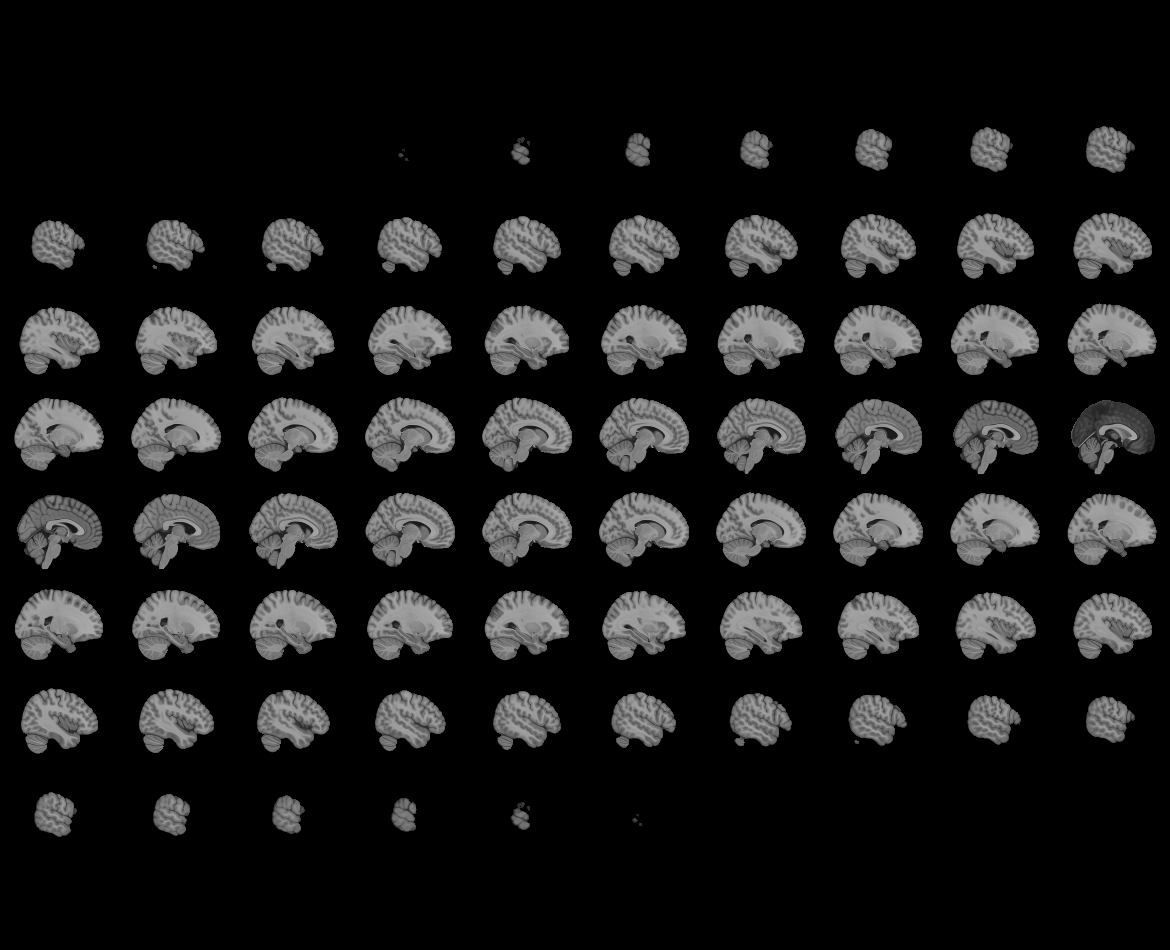
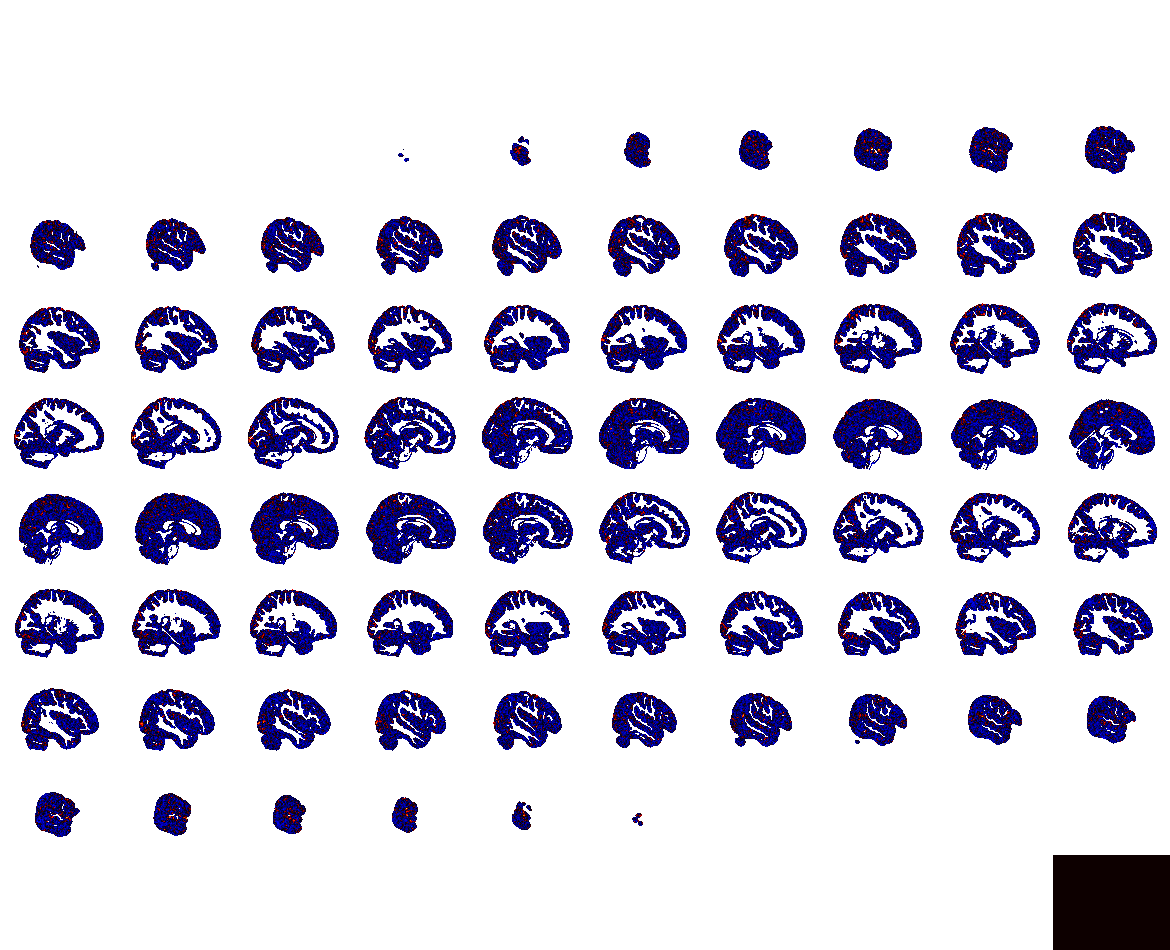

In [9]:
plotting.view_img(stab_mask_img)

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)



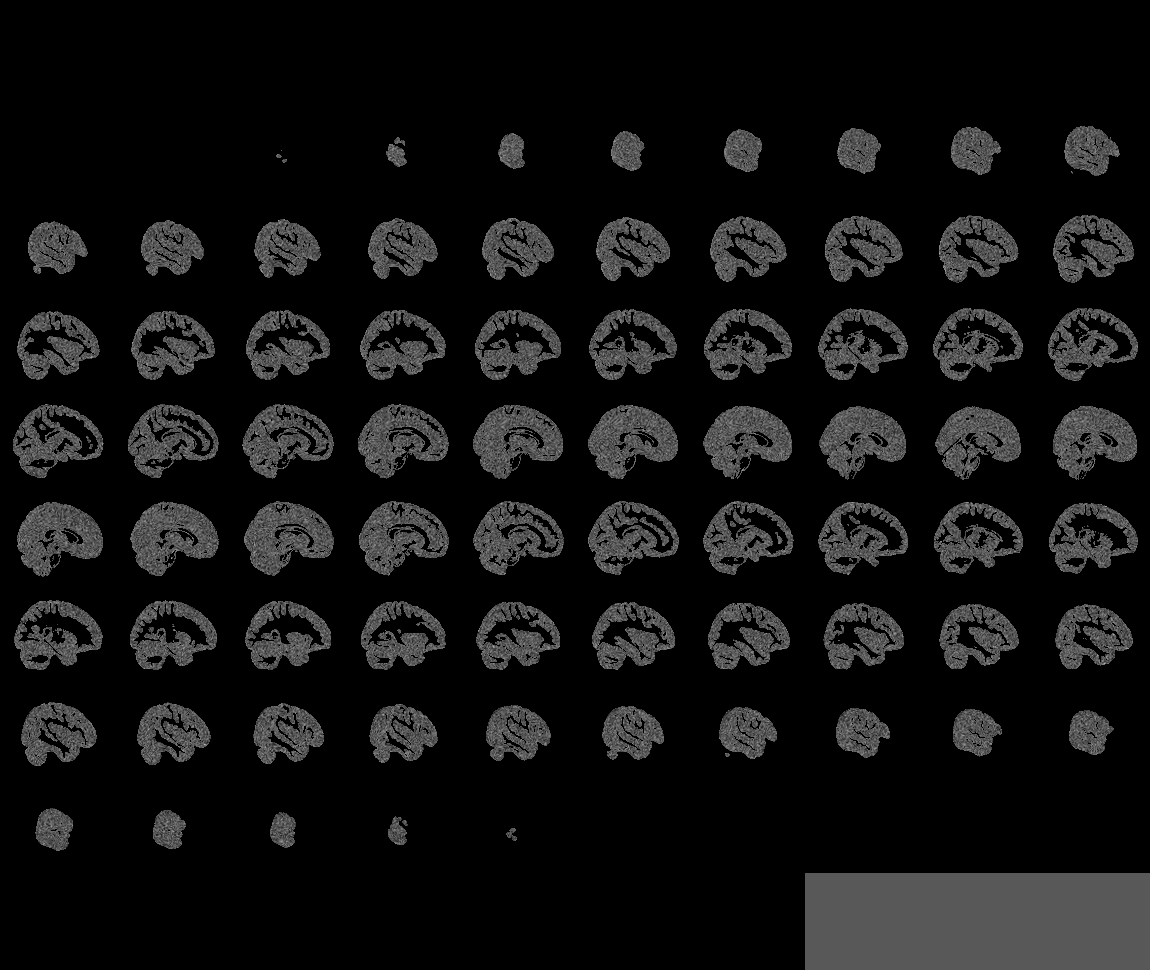
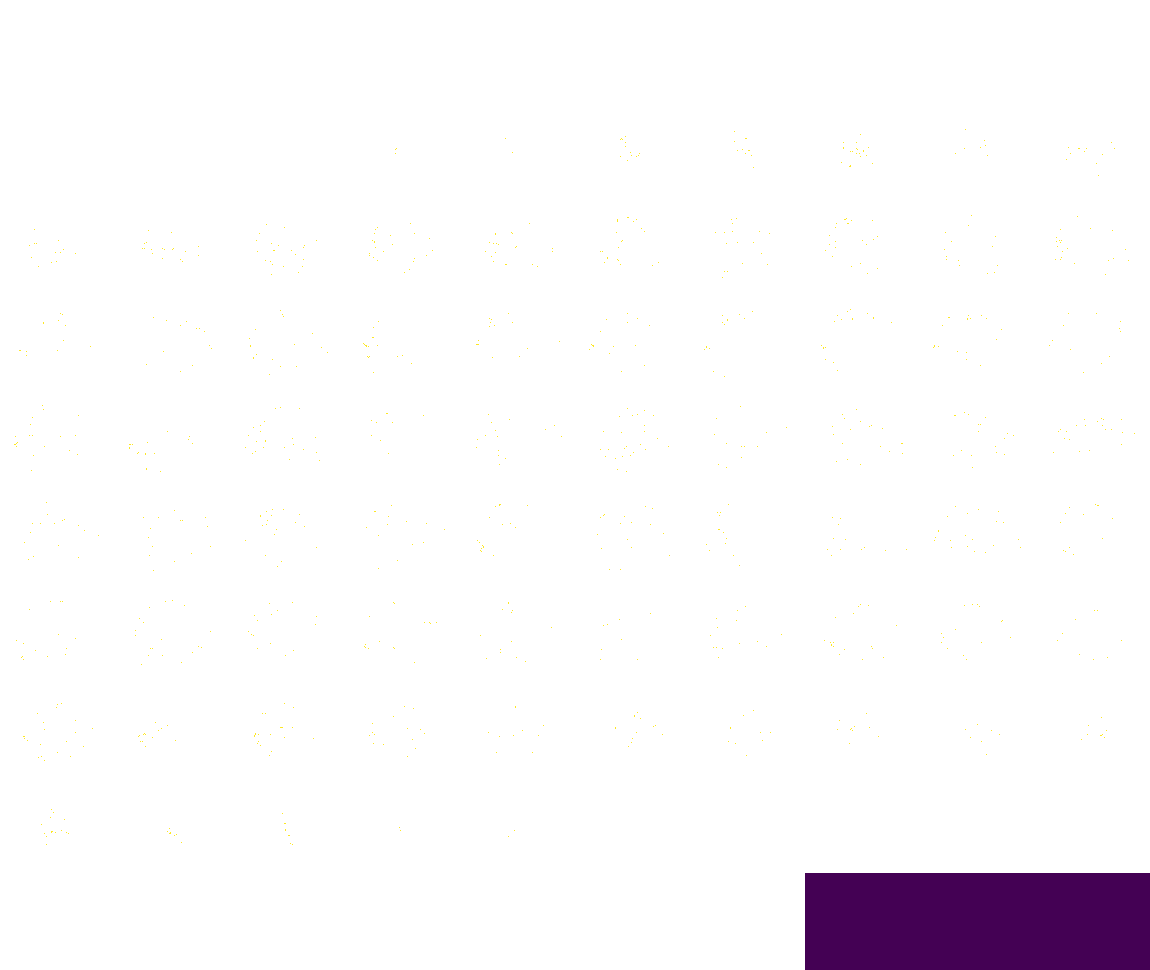

In [18]:
plotting.view_img(stab_mask_img_thres_bin, title=f'stability mask for subject {subject}', 
                  colorbar=True, cmap='viridis', symmetric_cmap=False,
                  bg_img=example_func.slicer[...,0])

In [19]:
np.sum(stab_mask_img_thres_bin.get_fdata())

1065.0

In [20]:
# save stability mask
# stab_mask_img_thres.to_filename()

# Subject iteration

In [21]:
subjectList = [ '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

In [22]:
thres = 0.085
n_folds = 4

for subject in subjectList:

    example_func = nb.load(os.path.join(func_dir,f'sub-{subject}_ses-01_task-02a_run-1_cleaned.nii.gz'))

    # Iterate on the runs
    for run in ['1','2','3','4']:

        # load cleaned image
        img_clean = nb.load(os.path.join(func_dir, f'sub-{subject}_ses-01_task-02a_run-{run}_cleaned.nii.gz'))

        # load and edit the events for classification
        events_split_2 = edit_events_full(data_root, subject, run)
            
        for ff in range(n_folds):

            # fetch stability mask
            stab_mask_data = np.load(os.path.join(stab_mask_dir, f'sub-{subject}_fold-{ff}_STAB.npy'))

            # generate image
            stab_mask_img = nb.Nifti1Image(stab_mask_data, example_func.affine, example_func.header)

            # threshold the stability map
            stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres)
            stab_mask_img_thres_bin = image.binarize_img(stab_mask_img_thres)

            # extract samples from the cleaned inside the stability mask
            samples = extract_samples(img_clean, stab_mask_img_thres_bin, subject, run)
            
            # convert samples to features
            convert_samples_to_features_perfold(samples, output_feat_full_dir, events_split_2, subject, run, ff) 

Editing events for subject 05, run 1...
Events edited for subject 05, run 1.
Extracting samples for subject 05, run 1...


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Samples extracted for subject 05, run 1.
Converting samples to features for subject 05, run 1, fold 0...
Features extracted and labels saved for subject 05, run 1, fold 0.
Extracting samples for subject 05, run 1...
Samples extracted for subject 05, run 1.
Converting samples to features for subject 05, run 1, fold 1...
Features extracted and labels saved for subject 05, run 1, fold 1.
Extracting samples for subject 05, run 1...
Samples extracted for subject 05, run 1.
Converting samples to features for subject 05, run 1, fold 2...
Features extracted and labels saved for subject 05, run 1, fold 2.
Extracting samples for subject 05, run 1...
Samples extracted for subject 05, run 1.
Converting samples to features for subject 05, run 1, fold 3...
Features extracted and labels saved for subject 05, run 1, fold 3.
Editing events for subject 05, run 2...
Events edited for subject 05, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 05, run 2...
Samples extracted for subject 05, run 2.
Converting samples to features for subject 05, run 2, fold 0...
Features extracted and labels saved for subject 05, run 2, fold 0.
Extracting samples for subject 05, run 2...
Samples extracted for subject 05, run 2.
Converting samples to features for subject 05, run 2, fold 1...
Features extracted and labels saved for subject 05, run 2, fold 1.
Extracting samples for subject 05, run 2...
Samples extracted for subject 05, run 2.
Converting samples to features for subject 05, run 2, fold 2...
Features extracted and labels saved for subject 05, run 2, fold 2.
Extracting samples for subject 05, run 2...
Samples extracted for subject 05, run 2.
Converting samples to features for subject 05, run 2, fold 3...
Features extracted and labels saved for subject 05, run 2, fold 3.
Editing events for subject 05, run 3...
Events edited for subject 05, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 05, run 3...
Samples extracted for subject 05, run 3.
Converting samples to features for subject 05, run 3, fold 0...
Features extracted and labels saved for subject 05, run 3, fold 0.
Extracting samples for subject 05, run 3...
Samples extracted for subject 05, run 3.
Converting samples to features for subject 05, run 3, fold 1...
Features extracted and labels saved for subject 05, run 3, fold 1.
Extracting samples for subject 05, run 3...
Samples extracted for subject 05, run 3.
Converting samples to features for subject 05, run 3, fold 2...
Features extracted and labels saved for subject 05, run 3, fold 2.
Extracting samples for subject 05, run 3...
Samples extracted for subject 05, run 3.
Converting samples to features for subject 05, run 3, fold 3...
Features extracted and labels saved for subject 05, run 3, fold 3.
Editing events for subject 05, run 4...
Events edited for subject 05, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 05, run 4...
Samples extracted for subject 05, run 4.
Converting samples to features for subject 05, run 4, fold 0...
Features extracted and labels saved for subject 05, run 4, fold 0.
Extracting samples for subject 05, run 4...
Samples extracted for subject 05, run 4.
Converting samples to features for subject 05, run 4, fold 1...
Features extracted and labels saved for subject 05, run 4, fold 1.
Extracting samples for subject 05, run 4...
Samples extracted for subject 05, run 4.
Converting samples to features for subject 05, run 4, fold 2...
Features extracted and labels saved for subject 05, run 4, fold 2.
Extracting samples for subject 05, run 4...
Samples extracted for subject 05, run 4.
Converting samples to features for subject 05, run 4, fold 3...
Features extracted and labels saved for subject 05, run 4, fold 3.
Editing events for subject 06, run 1...
Events edited for subject 06, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 06, run 1...
Samples extracted for subject 06, run 1.
Converting samples to features for subject 06, run 1, fold 0...
Features extracted and labels saved for subject 06, run 1, fold 0.
Extracting samples for subject 06, run 1...
Samples extracted for subject 06, run 1.
Converting samples to features for subject 06, run 1, fold 1...
Features extracted and labels saved for subject 06, run 1, fold 1.
Extracting samples for subject 06, run 1...
Samples extracted for subject 06, run 1.
Converting samples to features for subject 06, run 1, fold 2...
Features extracted and labels saved for subject 06, run 1, fold 2.
Extracting samples for subject 06, run 1...
Samples extracted for subject 06, run 1.
Converting samples to features for subject 06, run 1, fold 3...
Features extracted and labels saved for subject 06, run 1, fold 3.
Editing events for subject 06, run 2...
Events edited for subject 06, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 06, run 2...
Samples extracted for subject 06, run 2.
Converting samples to features for subject 06, run 2, fold 0...
Features extracted and labels saved for subject 06, run 2, fold 0.
Extracting samples for subject 06, run 2...
Samples extracted for subject 06, run 2.
Converting samples to features for subject 06, run 2, fold 1...
Features extracted and labels saved for subject 06, run 2, fold 1.
Extracting samples for subject 06, run 2...
Samples extracted for subject 06, run 2.
Converting samples to features for subject 06, run 2, fold 2...
Features extracted and labels saved for subject 06, run 2, fold 2.
Extracting samples for subject 06, run 2...
Samples extracted for subject 06, run 2.
Converting samples to features for subject 06, run 2, fold 3...
Features extracted and labels saved for subject 06, run 2, fold 3.
Editing events for subject 06, run 3...
Events edited for subject 06, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 06, run 3...
Samples extracted for subject 06, run 3.
Converting samples to features for subject 06, run 3, fold 0...
Features extracted and labels saved for subject 06, run 3, fold 0.
Extracting samples for subject 06, run 3...
Samples extracted for subject 06, run 3.
Converting samples to features for subject 06, run 3, fold 1...
Features extracted and labels saved for subject 06, run 3, fold 1.
Extracting samples for subject 06, run 3...
Samples extracted for subject 06, run 3.
Converting samples to features for subject 06, run 3, fold 2...
Features extracted and labels saved for subject 06, run 3, fold 2.
Extracting samples for subject 06, run 3...
Samples extracted for subject 06, run 3.
Converting samples to features for subject 06, run 3, fold 3...
Features extracted and labels saved for subject 06, run 3, fold 3.
Editing events for subject 06, run 4...
Events edited for subject 06, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 06, run 4...
Samples extracted for subject 06, run 4.
Converting samples to features for subject 06, run 4, fold 0...
Features extracted and labels saved for subject 06, run 4, fold 0.
Extracting samples for subject 06, run 4...
Samples extracted for subject 06, run 4.
Converting samples to features for subject 06, run 4, fold 1...
Features extracted and labels saved for subject 06, run 4, fold 1.
Extracting samples for subject 06, run 4...
Samples extracted for subject 06, run 4.
Converting samples to features for subject 06, run 4, fold 2...
Features extracted and labels saved for subject 06, run 4, fold 2.
Extracting samples for subject 06, run 4...
Samples extracted for subject 06, run 4.
Converting samples to features for subject 06, run 4, fold 3...
Features extracted and labels saved for subject 06, run 4, fold 3.
Editing events for subject 07, run 1...
Events edited for subject 07, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 07, run 1...
Samples extracted for subject 07, run 1.
Converting samples to features for subject 07, run 1, fold 0...
Features extracted and labels saved for subject 07, run 1, fold 0.
Extracting samples for subject 07, run 1...
Samples extracted for subject 07, run 1.
Converting samples to features for subject 07, run 1, fold 1...
Features extracted and labels saved for subject 07, run 1, fold 1.
Extracting samples for subject 07, run 1...
Samples extracted for subject 07, run 1.
Converting samples to features for subject 07, run 1, fold 2...
Features extracted and labels saved for subject 07, run 1, fold 2.
Extracting samples for subject 07, run 1...
Samples extracted for subject 07, run 1.
Converting samples to features for subject 07, run 1, fold 3...
Features extracted and labels saved for subject 07, run 1, fold 3.
Editing events for subject 07, run 2...
Events edited for subject 07, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 07, run 2...
Samples extracted for subject 07, run 2.
Converting samples to features for subject 07, run 2, fold 0...
Features extracted and labels saved for subject 07, run 2, fold 0.
Extracting samples for subject 07, run 2...
Samples extracted for subject 07, run 2.
Converting samples to features for subject 07, run 2, fold 1...
Features extracted and labels saved for subject 07, run 2, fold 1.
Extracting samples for subject 07, run 2...
Samples extracted for subject 07, run 2.
Converting samples to features for subject 07, run 2, fold 2...
Features extracted and labels saved for subject 07, run 2, fold 2.
Extracting samples for subject 07, run 2...
Samples extracted for subject 07, run 2.
Converting samples to features for subject 07, run 2, fold 3...
Features extracted and labels saved for subject 07, run 2, fold 3.
Editing events for subject 07, run 3...
Events edited for subject 07, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 07, run 3...
Samples extracted for subject 07, run 3.
Converting samples to features for subject 07, run 3, fold 0...
Features extracted and labels saved for subject 07, run 3, fold 0.
Extracting samples for subject 07, run 3...
Samples extracted for subject 07, run 3.
Converting samples to features for subject 07, run 3, fold 1...
Features extracted and labels saved for subject 07, run 3, fold 1.
Extracting samples for subject 07, run 3...
Samples extracted for subject 07, run 3.
Converting samples to features for subject 07, run 3, fold 2...
Features extracted and labels saved for subject 07, run 3, fold 2.
Extracting samples for subject 07, run 3...
Samples extracted for subject 07, run 3.
Converting samples to features for subject 07, run 3, fold 3...
Features extracted and labels saved for subject 07, run 3, fold 3.
Editing events for subject 07, run 4...
Events edited for subject 07, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 07, run 4...
Samples extracted for subject 07, run 4.
Converting samples to features for subject 07, run 4, fold 0...
Features extracted and labels saved for subject 07, run 4, fold 0.
Extracting samples for subject 07, run 4...
Samples extracted for subject 07, run 4.
Converting samples to features for subject 07, run 4, fold 1...
Features extracted and labels saved for subject 07, run 4, fold 1.
Extracting samples for subject 07, run 4...
Samples extracted for subject 07, run 4.
Converting samples to features for subject 07, run 4, fold 2...
Features extracted and labels saved for subject 07, run 4, fold 2.
Extracting samples for subject 07, run 4...
Samples extracted for subject 07, run 4.
Converting samples to features for subject 07, run 4, fold 3...
Features extracted and labels saved for subject 07, run 4, fold 3.
Editing events for subject 08, run 1...
Events edited for subject 08, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 08, run 1...
Samples extracted for subject 08, run 1.
Converting samples to features for subject 08, run 1, fold 0...
Features extracted and labels saved for subject 08, run 1, fold 0.
Extracting samples for subject 08, run 1...
Samples extracted for subject 08, run 1.
Converting samples to features for subject 08, run 1, fold 1...
Features extracted and labels saved for subject 08, run 1, fold 1.
Extracting samples for subject 08, run 1...
Samples extracted for subject 08, run 1.
Converting samples to features for subject 08, run 1, fold 2...
Features extracted and labels saved for subject 08, run 1, fold 2.
Extracting samples for subject 08, run 1...
Samples extracted for subject 08, run 1.
Converting samples to features for subject 08, run 1, fold 3...
Features extracted and labels saved for subject 08, run 1, fold 3.
Editing events for subject 08, run 2...
Events edited for subject 08, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 08, run 2...
Samples extracted for subject 08, run 2.
Converting samples to features for subject 08, run 2, fold 0...
Features extracted and labels saved for subject 08, run 2, fold 0.
Extracting samples for subject 08, run 2...
Samples extracted for subject 08, run 2.
Converting samples to features for subject 08, run 2, fold 1...
Features extracted and labels saved for subject 08, run 2, fold 1.
Extracting samples for subject 08, run 2...
Samples extracted for subject 08, run 2.
Converting samples to features for subject 08, run 2, fold 2...
Features extracted and labels saved for subject 08, run 2, fold 2.
Extracting samples for subject 08, run 2...
Samples extracted for subject 08, run 2.
Converting samples to features for subject 08, run 2, fold 3...
Features extracted and labels saved for subject 08, run 2, fold 3.
Editing events for subject 08, run 3...
Events edited for subject 08, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 08, run 3...
Samples extracted for subject 08, run 3.
Converting samples to features for subject 08, run 3, fold 0...
Features extracted and labels saved for subject 08, run 3, fold 0.
Extracting samples for subject 08, run 3...
Samples extracted for subject 08, run 3.
Converting samples to features for subject 08, run 3, fold 1...
Features extracted and labels saved for subject 08, run 3, fold 1.
Extracting samples for subject 08, run 3...
Samples extracted for subject 08, run 3.
Converting samples to features for subject 08, run 3, fold 2...
Features extracted and labels saved for subject 08, run 3, fold 2.
Extracting samples for subject 08, run 3...
Samples extracted for subject 08, run 3.
Converting samples to features for subject 08, run 3, fold 3...
Features extracted and labels saved for subject 08, run 3, fold 3.
Editing events for subject 08, run 4...
Events edited for subject 08, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 08, run 4...
Samples extracted for subject 08, run 4.
Converting samples to features for subject 08, run 4, fold 0...
Features extracted and labels saved for subject 08, run 4, fold 0.
Extracting samples for subject 08, run 4...
Samples extracted for subject 08, run 4.
Converting samples to features for subject 08, run 4, fold 1...
Features extracted and labels saved for subject 08, run 4, fold 1.
Extracting samples for subject 08, run 4...
Samples extracted for subject 08, run 4.
Converting samples to features for subject 08, run 4, fold 2...
Features extracted and labels saved for subject 08, run 4, fold 2.
Extracting samples for subject 08, run 4...
Samples extracted for subject 08, run 4.
Converting samples to features for subject 08, run 4, fold 3...
Features extracted and labels saved for subject 08, run 4, fold 3.
Editing events for subject 09, run 1...
Events edited for subject 09, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 09, run 1...
Samples extracted for subject 09, run 1.
Converting samples to features for subject 09, run 1, fold 0...
Features extracted and labels saved for subject 09, run 1, fold 0.
Extracting samples for subject 09, run 1...
Samples extracted for subject 09, run 1.
Converting samples to features for subject 09, run 1, fold 1...
Features extracted and labels saved for subject 09, run 1, fold 1.
Extracting samples for subject 09, run 1...
Samples extracted for subject 09, run 1.
Converting samples to features for subject 09, run 1, fold 2...
Features extracted and labels saved for subject 09, run 1, fold 2.
Extracting samples for subject 09, run 1...
Samples extracted for subject 09, run 1.
Converting samples to features for subject 09, run 1, fold 3...
Features extracted and labels saved for subject 09, run 1, fold 3.
Editing events for subject 09, run 2...
Events edited for subject 09, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 09, run 2...
Samples extracted for subject 09, run 2.
Converting samples to features for subject 09, run 2, fold 0...
Features extracted and labels saved for subject 09, run 2, fold 0.
Extracting samples for subject 09, run 2...
Samples extracted for subject 09, run 2.
Converting samples to features for subject 09, run 2, fold 1...
Features extracted and labels saved for subject 09, run 2, fold 1.
Extracting samples for subject 09, run 2...
Samples extracted for subject 09, run 2.
Converting samples to features for subject 09, run 2, fold 2...
Features extracted and labels saved for subject 09, run 2, fold 2.
Extracting samples for subject 09, run 2...
Samples extracted for subject 09, run 2.
Converting samples to features for subject 09, run 2, fold 3...
Features extracted and labels saved for subject 09, run 2, fold 3.
Editing events for subject 09, run 3...
Events edited for subject 09, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 09, run 3...
Samples extracted for subject 09, run 3.
Converting samples to features for subject 09, run 3, fold 0...
Features extracted and labels saved for subject 09, run 3, fold 0.
Extracting samples for subject 09, run 3...
Samples extracted for subject 09, run 3.
Converting samples to features for subject 09, run 3, fold 1...
Features extracted and labels saved for subject 09, run 3, fold 1.
Extracting samples for subject 09, run 3...
Samples extracted for subject 09, run 3.
Converting samples to features for subject 09, run 3, fold 2...
Features extracted and labels saved for subject 09, run 3, fold 2.
Extracting samples for subject 09, run 3...
Samples extracted for subject 09, run 3.
Converting samples to features for subject 09, run 3, fold 3...
Features extracted and labels saved for subject 09, run 3, fold 3.
Editing events for subject 09, run 4...
Events edited for subject 09, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 09, run 4...
Samples extracted for subject 09, run 4.
Converting samples to features for subject 09, run 4, fold 0...
Features extracted and labels saved for subject 09, run 4, fold 0.
Extracting samples for subject 09, run 4...
Samples extracted for subject 09, run 4.
Converting samples to features for subject 09, run 4, fold 1...
Features extracted and labels saved for subject 09, run 4, fold 1.
Extracting samples for subject 09, run 4...
Samples extracted for subject 09, run 4.
Converting samples to features for subject 09, run 4, fold 2...
Features extracted and labels saved for subject 09, run 4, fold 2.
Extracting samples for subject 09, run 4...
Samples extracted for subject 09, run 4.
Converting samples to features for subject 09, run 4, fold 3...
Features extracted and labels saved for subject 09, run 4, fold 3.
Editing events for subject 10, run 1...
Events edited for subject 10, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 10, run 1...
Samples extracted for subject 10, run 1.
Converting samples to features for subject 10, run 1, fold 0...
Features extracted and labels saved for subject 10, run 1, fold 0.
Extracting samples for subject 10, run 1...
Samples extracted for subject 10, run 1.
Converting samples to features for subject 10, run 1, fold 1...
Features extracted and labels saved for subject 10, run 1, fold 1.
Extracting samples for subject 10, run 1...
Samples extracted for subject 10, run 1.
Converting samples to features for subject 10, run 1, fold 2...
Features extracted and labels saved for subject 10, run 1, fold 2.
Extracting samples for subject 10, run 1...
Samples extracted for subject 10, run 1.
Converting samples to features for subject 10, run 1, fold 3...
Features extracted and labels saved for subject 10, run 1, fold 3.
Editing events for subject 10, run 2...
Events edited for subject 10, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 10, run 2...
Samples extracted for subject 10, run 2.
Converting samples to features for subject 10, run 2, fold 0...
Features extracted and labels saved for subject 10, run 2, fold 0.
Extracting samples for subject 10, run 2...
Samples extracted for subject 10, run 2.
Converting samples to features for subject 10, run 2, fold 1...
Features extracted and labels saved for subject 10, run 2, fold 1.
Extracting samples for subject 10, run 2...
Samples extracted for subject 10, run 2.
Converting samples to features for subject 10, run 2, fold 2...
Features extracted and labels saved for subject 10, run 2, fold 2.
Extracting samples for subject 10, run 2...
Samples extracted for subject 10, run 2.
Converting samples to features for subject 10, run 2, fold 3...
Features extracted and labels saved for subject 10, run 2, fold 3.
Editing events for subject 10, run 3...
Events edited for subject 10, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 10, run 3...
Samples extracted for subject 10, run 3.
Converting samples to features for subject 10, run 3, fold 0...
Features extracted and labels saved for subject 10, run 3, fold 0.
Extracting samples for subject 10, run 3...
Samples extracted for subject 10, run 3.
Converting samples to features for subject 10, run 3, fold 1...
Features extracted and labels saved for subject 10, run 3, fold 1.
Extracting samples for subject 10, run 3...
Samples extracted for subject 10, run 3.
Converting samples to features for subject 10, run 3, fold 2...
Features extracted and labels saved for subject 10, run 3, fold 2.
Extracting samples for subject 10, run 3...
Samples extracted for subject 10, run 3.
Converting samples to features for subject 10, run 3, fold 3...
Features extracted and labels saved for subject 10, run 3, fold 3.
Editing events for subject 10, run 4...
Events edited for subject 10, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 10, run 4...
Samples extracted for subject 10, run 4.
Converting samples to features for subject 10, run 4, fold 0...
Features extracted and labels saved for subject 10, run 4, fold 0.
Extracting samples for subject 10, run 4...
Samples extracted for subject 10, run 4.
Converting samples to features for subject 10, run 4, fold 1...
Features extracted and labels saved for subject 10, run 4, fold 1.
Extracting samples for subject 10, run 4...
Samples extracted for subject 10, run 4.
Converting samples to features for subject 10, run 4, fold 2...
Features extracted and labels saved for subject 10, run 4, fold 2.
Extracting samples for subject 10, run 4...
Samples extracted for subject 10, run 4.
Converting samples to features for subject 10, run 4, fold 3...
Features extracted and labels saved for subject 10, run 4, fold 3.
Editing events for subject 11, run 1...
Events edited for subject 11, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 11, run 1...
Samples extracted for subject 11, run 1.
Converting samples to features for subject 11, run 1, fold 0...
Features extracted and labels saved for subject 11, run 1, fold 0.
Extracting samples for subject 11, run 1...
Samples extracted for subject 11, run 1.
Converting samples to features for subject 11, run 1, fold 1...
Features extracted and labels saved for subject 11, run 1, fold 1.
Extracting samples for subject 11, run 1...
Samples extracted for subject 11, run 1.
Converting samples to features for subject 11, run 1, fold 2...
Features extracted and labels saved for subject 11, run 1, fold 2.
Extracting samples for subject 11, run 1...
Samples extracted for subject 11, run 1.
Converting samples to features for subject 11, run 1, fold 3...
Features extracted and labels saved for subject 11, run 1, fold 3.
Editing events for subject 11, run 2...
Events edited for subject 11, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 11, run 2...
Samples extracted for subject 11, run 2.
Converting samples to features for subject 11, run 2, fold 0...
Features extracted and labels saved for subject 11, run 2, fold 0.
Extracting samples for subject 11, run 2...
Samples extracted for subject 11, run 2.
Converting samples to features for subject 11, run 2, fold 1...
Features extracted and labels saved for subject 11, run 2, fold 1.
Extracting samples for subject 11, run 2...
Samples extracted for subject 11, run 2.
Converting samples to features for subject 11, run 2, fold 2...
Features extracted and labels saved for subject 11, run 2, fold 2.
Extracting samples for subject 11, run 2...
Samples extracted for subject 11, run 2.
Converting samples to features for subject 11, run 2, fold 3...
Features extracted and labels saved for subject 11, run 2, fold 3.
Editing events for subject 11, run 3...
Events edited for subject 11, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 11, run 3...
Samples extracted for subject 11, run 3.
Converting samples to features for subject 11, run 3, fold 0...
Features extracted and labels saved for subject 11, run 3, fold 0.
Extracting samples for subject 11, run 3...
Samples extracted for subject 11, run 3.
Converting samples to features for subject 11, run 3, fold 1...
Features extracted and labels saved for subject 11, run 3, fold 1.
Extracting samples for subject 11, run 3...
Samples extracted for subject 11, run 3.
Converting samples to features for subject 11, run 3, fold 2...
Features extracted and labels saved for subject 11, run 3, fold 2.
Extracting samples for subject 11, run 3...
Samples extracted for subject 11, run 3.
Converting samples to features for subject 11, run 3, fold 3...
Features extracted and labels saved for subject 11, run 3, fold 3.
Editing events for subject 11, run 4...
Events edited for subject 11, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 11, run 4...
Samples extracted for subject 11, run 4.
Converting samples to features for subject 11, run 4, fold 0...
Features extracted and labels saved for subject 11, run 4, fold 0.
Extracting samples for subject 11, run 4...
Samples extracted for subject 11, run 4.
Converting samples to features for subject 11, run 4, fold 1...
Features extracted and labels saved for subject 11, run 4, fold 1.
Extracting samples for subject 11, run 4...
Samples extracted for subject 11, run 4.
Converting samples to features for subject 11, run 4, fold 2...
Features extracted and labels saved for subject 11, run 4, fold 2.
Extracting samples for subject 11, run 4...
Samples extracted for subject 11, run 4.
Converting samples to features for subject 11, run 4, fold 3...
Features extracted and labels saved for subject 11, run 4, fold 3.
Editing events for subject 12, run 1...
Events edited for subject 12, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 12, run 1...
Samples extracted for subject 12, run 1.
Converting samples to features for subject 12, run 1, fold 0...
Features extracted and labels saved for subject 12, run 1, fold 0.
Extracting samples for subject 12, run 1...
Samples extracted for subject 12, run 1.
Converting samples to features for subject 12, run 1, fold 1...
Features extracted and labels saved for subject 12, run 1, fold 1.
Extracting samples for subject 12, run 1...
Samples extracted for subject 12, run 1.
Converting samples to features for subject 12, run 1, fold 2...
Features extracted and labels saved for subject 12, run 1, fold 2.
Extracting samples for subject 12, run 1...
Samples extracted for subject 12, run 1.
Converting samples to features for subject 12, run 1, fold 3...
Features extracted and labels saved for subject 12, run 1, fold 3.
Editing events for subject 12, run 2...
Events edited for subject 12, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 12, run 2...
Samples extracted for subject 12, run 2.
Converting samples to features for subject 12, run 2, fold 0...
Features extracted and labels saved for subject 12, run 2, fold 0.
Extracting samples for subject 12, run 2...
Samples extracted for subject 12, run 2.
Converting samples to features for subject 12, run 2, fold 1...
Features extracted and labels saved for subject 12, run 2, fold 1.
Extracting samples for subject 12, run 2...
Samples extracted for subject 12, run 2.
Converting samples to features for subject 12, run 2, fold 2...
Features extracted and labels saved for subject 12, run 2, fold 2.
Extracting samples for subject 12, run 2...
Samples extracted for subject 12, run 2.
Converting samples to features for subject 12, run 2, fold 3...
Features extracted and labels saved for subject 12, run 2, fold 3.
Editing events for subject 12, run 3...
Events edited for subject 12, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 12, run 3...
Samples extracted for subject 12, run 3.
Converting samples to features for subject 12, run 3, fold 0...
Features extracted and labels saved for subject 12, run 3, fold 0.
Extracting samples for subject 12, run 3...
Samples extracted for subject 12, run 3.
Converting samples to features for subject 12, run 3, fold 1...
Features extracted and labels saved for subject 12, run 3, fold 1.
Extracting samples for subject 12, run 3...
Samples extracted for subject 12, run 3.
Converting samples to features for subject 12, run 3, fold 2...
Features extracted and labels saved for subject 12, run 3, fold 2.
Extracting samples for subject 12, run 3...
Samples extracted for subject 12, run 3.
Converting samples to features for subject 12, run 3, fold 3...
Features extracted and labels saved for subject 12, run 3, fold 3.
Editing events for subject 12, run 4...
Events edited for subject 12, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 12, run 4...
Samples extracted for subject 12, run 4.
Converting samples to features for subject 12, run 4, fold 0...
Features extracted and labels saved for subject 12, run 4, fold 0.
Extracting samples for subject 12, run 4...
Samples extracted for subject 12, run 4.
Converting samples to features for subject 12, run 4, fold 1...
Features extracted and labels saved for subject 12, run 4, fold 1.
Extracting samples for subject 12, run 4...
Samples extracted for subject 12, run 4.
Converting samples to features for subject 12, run 4, fold 2...
Features extracted and labels saved for subject 12, run 4, fold 2.
Extracting samples for subject 12, run 4...
Samples extracted for subject 12, run 4.
Converting samples to features for subject 12, run 4, fold 3...
Features extracted and labels saved for subject 12, run 4, fold 3.
Editing events for subject 13, run 1...
Events edited for subject 13, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 13, run 1...
Samples extracted for subject 13, run 1.
Converting samples to features for subject 13, run 1, fold 0...
Features extracted and labels saved for subject 13, run 1, fold 0.
Extracting samples for subject 13, run 1...
Samples extracted for subject 13, run 1.
Converting samples to features for subject 13, run 1, fold 1...
Features extracted and labels saved for subject 13, run 1, fold 1.
Extracting samples for subject 13, run 1...
Samples extracted for subject 13, run 1.
Converting samples to features for subject 13, run 1, fold 2...
Features extracted and labels saved for subject 13, run 1, fold 2.
Extracting samples for subject 13, run 1...
Samples extracted for subject 13, run 1.
Converting samples to features for subject 13, run 1, fold 3...
Features extracted and labels saved for subject 13, run 1, fold 3.
Editing events for subject 13, run 2...
Events edited for subject 13, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 13, run 2...
Samples extracted for subject 13, run 2.
Converting samples to features for subject 13, run 2, fold 0...
Features extracted and labels saved for subject 13, run 2, fold 0.
Extracting samples for subject 13, run 2...
Samples extracted for subject 13, run 2.
Converting samples to features for subject 13, run 2, fold 1...
Features extracted and labels saved for subject 13, run 2, fold 1.
Extracting samples for subject 13, run 2...
Samples extracted for subject 13, run 2.
Converting samples to features for subject 13, run 2, fold 2...
Features extracted and labels saved for subject 13, run 2, fold 2.
Extracting samples for subject 13, run 2...
Samples extracted for subject 13, run 2.
Converting samples to features for subject 13, run 2, fold 3...
Features extracted and labels saved for subject 13, run 2, fold 3.
Editing events for subject 13, run 3...
Events edited for subject 13, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 13, run 3...
Samples extracted for subject 13, run 3.
Converting samples to features for subject 13, run 3, fold 0...
Features extracted and labels saved for subject 13, run 3, fold 0.
Extracting samples for subject 13, run 3...
Samples extracted for subject 13, run 3.
Converting samples to features for subject 13, run 3, fold 1...
Features extracted and labels saved for subject 13, run 3, fold 1.
Extracting samples for subject 13, run 3...
Samples extracted for subject 13, run 3.
Converting samples to features for subject 13, run 3, fold 2...
Features extracted and labels saved for subject 13, run 3, fold 2.
Extracting samples for subject 13, run 3...
Samples extracted for subject 13, run 3.
Converting samples to features for subject 13, run 3, fold 3...
Features extracted and labels saved for subject 13, run 3, fold 3.
Editing events for subject 13, run 4...
Events edited for subject 13, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 13, run 4...
Samples extracted for subject 13, run 4.
Converting samples to features for subject 13, run 4, fold 0...
Features extracted and labels saved for subject 13, run 4, fold 0.
Extracting samples for subject 13, run 4...
Samples extracted for subject 13, run 4.
Converting samples to features for subject 13, run 4, fold 1...
Features extracted and labels saved for subject 13, run 4, fold 1.
Extracting samples for subject 13, run 4...
Samples extracted for subject 13, run 4.
Converting samples to features for subject 13, run 4, fold 2...
Features extracted and labels saved for subject 13, run 4, fold 2.
Extracting samples for subject 13, run 4...
Samples extracted for subject 13, run 4.
Converting samples to features for subject 13, run 4, fold 3...
Features extracted and labels saved for subject 13, run 4, fold 3.
Editing events for subject 14, run 1...
Events edited for subject 14, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 14, run 1...
Samples extracted for subject 14, run 1.
Converting samples to features for subject 14, run 1, fold 0...
Features extracted and labels saved for subject 14, run 1, fold 0.
Extracting samples for subject 14, run 1...
Samples extracted for subject 14, run 1.
Converting samples to features for subject 14, run 1, fold 1...
Features extracted and labels saved for subject 14, run 1, fold 1.
Extracting samples for subject 14, run 1...
Samples extracted for subject 14, run 1.
Converting samples to features for subject 14, run 1, fold 2...
Features extracted and labels saved for subject 14, run 1, fold 2.
Extracting samples for subject 14, run 1...
Samples extracted for subject 14, run 1.
Converting samples to features for subject 14, run 1, fold 3...
Features extracted and labels saved for subject 14, run 1, fold 3.
Editing events for subject 14, run 2...
Events edited for subject 14, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 14, run 2...
Samples extracted for subject 14, run 2.
Converting samples to features for subject 14, run 2, fold 0...
Features extracted and labels saved for subject 14, run 2, fold 0.
Extracting samples for subject 14, run 2...
Samples extracted for subject 14, run 2.
Converting samples to features for subject 14, run 2, fold 1...
Features extracted and labels saved for subject 14, run 2, fold 1.
Extracting samples for subject 14, run 2...
Samples extracted for subject 14, run 2.
Converting samples to features for subject 14, run 2, fold 2...
Features extracted and labels saved for subject 14, run 2, fold 2.
Extracting samples for subject 14, run 2...
Samples extracted for subject 14, run 2.
Converting samples to features for subject 14, run 2, fold 3...
Features extracted and labels saved for subject 14, run 2, fold 3.
Editing events for subject 14, run 3...
Events edited for subject 14, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 14, run 3...
Samples extracted for subject 14, run 3.
Converting samples to features for subject 14, run 3, fold 0...
Features extracted and labels saved for subject 14, run 3, fold 0.
Extracting samples for subject 14, run 3...
Samples extracted for subject 14, run 3.
Converting samples to features for subject 14, run 3, fold 1...
Features extracted and labels saved for subject 14, run 3, fold 1.
Extracting samples for subject 14, run 3...
Samples extracted for subject 14, run 3.
Converting samples to features for subject 14, run 3, fold 2...
Features extracted and labels saved for subject 14, run 3, fold 2.
Extracting samples for subject 14, run 3...
Samples extracted for subject 14, run 3.
Converting samples to features for subject 14, run 3, fold 3...
Features extracted and labels saved for subject 14, run 3, fold 3.
Editing events for subject 14, run 4...
Events edited for subject 14, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 14, run 4...
Samples extracted for subject 14, run 4.
Converting samples to features for subject 14, run 4, fold 0...
Features extracted and labels saved for subject 14, run 4, fold 0.
Extracting samples for subject 14, run 4...
Samples extracted for subject 14, run 4.
Converting samples to features for subject 14, run 4, fold 1...
Features extracted and labels saved for subject 14, run 4, fold 1.
Extracting samples for subject 14, run 4...
Samples extracted for subject 14, run 4.
Converting samples to features for subject 14, run 4, fold 2...
Features extracted and labels saved for subject 14, run 4, fold 2.
Extracting samples for subject 14, run 4...
Samples extracted for subject 14, run 4.
Converting samples to features for subject 14, run 4, fold 3...
Features extracted and labels saved for subject 14, run 4, fold 3.
Editing events for subject 15, run 1...
Events edited for subject 15, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 15, run 1...
Samples extracted for subject 15, run 1.
Converting samples to features for subject 15, run 1, fold 0...
Features extracted and labels saved for subject 15, run 1, fold 0.
Extracting samples for subject 15, run 1...
Samples extracted for subject 15, run 1.
Converting samples to features for subject 15, run 1, fold 1...
Features extracted and labels saved for subject 15, run 1, fold 1.
Extracting samples for subject 15, run 1...
Samples extracted for subject 15, run 1.
Converting samples to features for subject 15, run 1, fold 2...
Features extracted and labels saved for subject 15, run 1, fold 2.
Extracting samples for subject 15, run 1...
Samples extracted for subject 15, run 1.
Converting samples to features for subject 15, run 1, fold 3...
Features extracted and labels saved for subject 15, run 1, fold 3.
Editing events for subject 15, run 2...
Events edited for subject 15, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 15, run 2...
Samples extracted for subject 15, run 2.
Converting samples to features for subject 15, run 2, fold 0...
Features extracted and labels saved for subject 15, run 2, fold 0.
Extracting samples for subject 15, run 2...
Samples extracted for subject 15, run 2.
Converting samples to features for subject 15, run 2, fold 1...
Features extracted and labels saved for subject 15, run 2, fold 1.
Extracting samples for subject 15, run 2...
Samples extracted for subject 15, run 2.
Converting samples to features for subject 15, run 2, fold 2...
Features extracted and labels saved for subject 15, run 2, fold 2.
Extracting samples for subject 15, run 2...
Samples extracted for subject 15, run 2.
Converting samples to features for subject 15, run 2, fold 3...
Features extracted and labels saved for subject 15, run 2, fold 3.
Editing events for subject 15, run 3...
Events edited for subject 15, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 15, run 3...
Samples extracted for subject 15, run 3.
Converting samples to features for subject 15, run 3, fold 0...
Features extracted and labels saved for subject 15, run 3, fold 0.
Extracting samples for subject 15, run 3...
Samples extracted for subject 15, run 3.
Converting samples to features for subject 15, run 3, fold 1...
Features extracted and labels saved for subject 15, run 3, fold 1.
Extracting samples for subject 15, run 3...
Samples extracted for subject 15, run 3.
Converting samples to features for subject 15, run 3, fold 2...
Features extracted and labels saved for subject 15, run 3, fold 2.
Extracting samples for subject 15, run 3...
Samples extracted for subject 15, run 3.
Converting samples to features for subject 15, run 3, fold 3...
Features extracted and labels saved for subject 15, run 3, fold 3.
Editing events for subject 15, run 4...
Events edited for subject 15, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 15, run 4...
Samples extracted for subject 15, run 4.
Converting samples to features for subject 15, run 4, fold 0...
Features extracted and labels saved for subject 15, run 4, fold 0.
Extracting samples for subject 15, run 4...
Samples extracted for subject 15, run 4.
Converting samples to features for subject 15, run 4, fold 1...
Features extracted and labels saved for subject 15, run 4, fold 1.
Extracting samples for subject 15, run 4...
Samples extracted for subject 15, run 4.
Converting samples to features for subject 15, run 4, fold 2...
Features extracted and labels saved for subject 15, run 4, fold 2.
Extracting samples for subject 15, run 4...
Samples extracted for subject 15, run 4.
Converting samples to features for subject 15, run 4, fold 3...
Features extracted and labels saved for subject 15, run 4, fold 3.
Editing events for subject 16, run 1...
Events edited for subject 16, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 16, run 1...
Samples extracted for subject 16, run 1.
Converting samples to features for subject 16, run 1, fold 0...
Features extracted and labels saved for subject 16, run 1, fold 0.
Extracting samples for subject 16, run 1...
Samples extracted for subject 16, run 1.
Converting samples to features for subject 16, run 1, fold 1...
Features extracted and labels saved for subject 16, run 1, fold 1.
Extracting samples for subject 16, run 1...
Samples extracted for subject 16, run 1.
Converting samples to features for subject 16, run 1, fold 2...
Features extracted and labels saved for subject 16, run 1, fold 2.
Extracting samples for subject 16, run 1...
Samples extracted for subject 16, run 1.
Converting samples to features for subject 16, run 1, fold 3...
Features extracted and labels saved for subject 16, run 1, fold 3.
Editing events for subject 16, run 2...
Events edited for subject 16, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 16, run 2...
Samples extracted for subject 16, run 2.
Converting samples to features for subject 16, run 2, fold 0...
Features extracted and labels saved for subject 16, run 2, fold 0.
Extracting samples for subject 16, run 2...
Samples extracted for subject 16, run 2.
Converting samples to features for subject 16, run 2, fold 1...
Features extracted and labels saved for subject 16, run 2, fold 1.
Extracting samples for subject 16, run 2...
Samples extracted for subject 16, run 2.
Converting samples to features for subject 16, run 2, fold 2...
Features extracted and labels saved for subject 16, run 2, fold 2.
Extracting samples for subject 16, run 2...
Samples extracted for subject 16, run 2.
Converting samples to features for subject 16, run 2, fold 3...
Features extracted and labels saved for subject 16, run 2, fold 3.
Editing events for subject 16, run 3...
Events edited for subject 16, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 16, run 3...
Samples extracted for subject 16, run 3.
Converting samples to features for subject 16, run 3, fold 0...
Features extracted and labels saved for subject 16, run 3, fold 0.
Extracting samples for subject 16, run 3...
Samples extracted for subject 16, run 3.
Converting samples to features for subject 16, run 3, fold 1...
Features extracted and labels saved for subject 16, run 3, fold 1.
Extracting samples for subject 16, run 3...
Samples extracted for subject 16, run 3.
Converting samples to features for subject 16, run 3, fold 2...
Features extracted and labels saved for subject 16, run 3, fold 2.
Extracting samples for subject 16, run 3...
Samples extracted for subject 16, run 3.
Converting samples to features for subject 16, run 3, fold 3...
Features extracted and labels saved for subject 16, run 3, fold 3.
Editing events for subject 16, run 4...
Events edited for subject 16, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 16, run 4...
Samples extracted for subject 16, run 4.
Converting samples to features for subject 16, run 4, fold 0...
Features extracted and labels saved for subject 16, run 4, fold 0.
Extracting samples for subject 16, run 4...
Samples extracted for subject 16, run 4.
Converting samples to features for subject 16, run 4, fold 1...
Features extracted and labels saved for subject 16, run 4, fold 1.
Extracting samples for subject 16, run 4...
Samples extracted for subject 16, run 4.
Converting samples to features for subject 16, run 4, fold 2...
Features extracted and labels saved for subject 16, run 4, fold 2.
Extracting samples for subject 16, run 4...
Samples extracted for subject 16, run 4.
Converting samples to features for subject 16, run 4, fold 3...
Features extracted and labels saved for subject 16, run 4, fold 3.
Editing events for subject 17, run 1...
Events edited for subject 17, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 17, run 1...
Samples extracted for subject 17, run 1.
Converting samples to features for subject 17, run 1, fold 0...
Features extracted and labels saved for subject 17, run 1, fold 0.
Extracting samples for subject 17, run 1...
Samples extracted for subject 17, run 1.
Converting samples to features for subject 17, run 1, fold 1...
Features extracted and labels saved for subject 17, run 1, fold 1.
Extracting samples for subject 17, run 1...
Samples extracted for subject 17, run 1.
Converting samples to features for subject 17, run 1, fold 2...
Features extracted and labels saved for subject 17, run 1, fold 2.
Extracting samples for subject 17, run 1...
Samples extracted for subject 17, run 1.
Converting samples to features for subject 17, run 1, fold 3...
Features extracted and labels saved for subject 17, run 1, fold 3.
Editing events for subject 17, run 2...
Events edited for subject 17, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 17, run 2...
Samples extracted for subject 17, run 2.
Converting samples to features for subject 17, run 2, fold 0...
Features extracted and labels saved for subject 17, run 2, fold 0.
Extracting samples for subject 17, run 2...
Samples extracted for subject 17, run 2.
Converting samples to features for subject 17, run 2, fold 1...
Features extracted and labels saved for subject 17, run 2, fold 1.
Extracting samples for subject 17, run 2...
Samples extracted for subject 17, run 2.
Converting samples to features for subject 17, run 2, fold 2...
Features extracted and labels saved for subject 17, run 2, fold 2.
Extracting samples for subject 17, run 2...
Samples extracted for subject 17, run 2.
Converting samples to features for subject 17, run 2, fold 3...
Features extracted and labels saved for subject 17, run 2, fold 3.
Editing events for subject 17, run 3...
Events edited for subject 17, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 17, run 3...
Samples extracted for subject 17, run 3.
Converting samples to features for subject 17, run 3, fold 0...
Features extracted and labels saved for subject 17, run 3, fold 0.
Extracting samples for subject 17, run 3...
Samples extracted for subject 17, run 3.
Converting samples to features for subject 17, run 3, fold 1...
Features extracted and labels saved for subject 17, run 3, fold 1.
Extracting samples for subject 17, run 3...
Samples extracted for subject 17, run 3.
Converting samples to features for subject 17, run 3, fold 2...
Features extracted and labels saved for subject 17, run 3, fold 2.
Extracting samples for subject 17, run 3...
Samples extracted for subject 17, run 3.
Converting samples to features for subject 17, run 3, fold 3...
Features extracted and labels saved for subject 17, run 3, fold 3.
Editing events for subject 17, run 4...
Events edited for subject 17, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 17, run 4...
Samples extracted for subject 17, run 4.
Converting samples to features for subject 17, run 4, fold 0...
Features extracted and labels saved for subject 17, run 4, fold 0.
Extracting samples for subject 17, run 4...
Samples extracted for subject 17, run 4.
Converting samples to features for subject 17, run 4, fold 1...
Features extracted and labels saved for subject 17, run 4, fold 1.
Extracting samples for subject 17, run 4...
Samples extracted for subject 17, run 4.
Converting samples to features for subject 17, run 4, fold 2...
Features extracted and labels saved for subject 17, run 4, fold 2.
Extracting samples for subject 17, run 4...
Samples extracted for subject 17, run 4.
Converting samples to features for subject 17, run 4, fold 3...
Features extracted and labels saved for subject 17, run 4, fold 3.
Editing events for subject 18, run 1...
Events edited for subject 18, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 18, run 1...
Samples extracted for subject 18, run 1.
Converting samples to features for subject 18, run 1, fold 0...
Features extracted and labels saved for subject 18, run 1, fold 0.
Extracting samples for subject 18, run 1...
Samples extracted for subject 18, run 1.
Converting samples to features for subject 18, run 1, fold 1...
Features extracted and labels saved for subject 18, run 1, fold 1.
Extracting samples for subject 18, run 1...
Samples extracted for subject 18, run 1.
Converting samples to features for subject 18, run 1, fold 2...
Features extracted and labels saved for subject 18, run 1, fold 2.
Extracting samples for subject 18, run 1...
Samples extracted for subject 18, run 1.
Converting samples to features for subject 18, run 1, fold 3...
Features extracted and labels saved for subject 18, run 1, fold 3.
Editing events for subject 18, run 2...
Events edited for subject 18, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 18, run 2...
Samples extracted for subject 18, run 2.
Converting samples to features for subject 18, run 2, fold 0...
Features extracted and labels saved for subject 18, run 2, fold 0.
Extracting samples for subject 18, run 2...
Samples extracted for subject 18, run 2.
Converting samples to features for subject 18, run 2, fold 1...
Features extracted and labels saved for subject 18, run 2, fold 1.
Extracting samples for subject 18, run 2...
Samples extracted for subject 18, run 2.
Converting samples to features for subject 18, run 2, fold 2...
Features extracted and labels saved for subject 18, run 2, fold 2.
Extracting samples for subject 18, run 2...
Samples extracted for subject 18, run 2.
Converting samples to features for subject 18, run 2, fold 3...
Features extracted and labels saved for subject 18, run 2, fold 3.
Editing events for subject 18, run 3...
Events edited for subject 18, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 18, run 3...
Samples extracted for subject 18, run 3.
Converting samples to features for subject 18, run 3, fold 0...
Features extracted and labels saved for subject 18, run 3, fold 0.
Extracting samples for subject 18, run 3...
Samples extracted for subject 18, run 3.
Converting samples to features for subject 18, run 3, fold 1...
Features extracted and labels saved for subject 18, run 3, fold 1.
Extracting samples for subject 18, run 3...
Samples extracted for subject 18, run 3.
Converting samples to features for subject 18, run 3, fold 2...
Features extracted and labels saved for subject 18, run 3, fold 2.
Extracting samples for subject 18, run 3...
Samples extracted for subject 18, run 3.
Converting samples to features for subject 18, run 3, fold 3...
Features extracted and labels saved for subject 18, run 3, fold 3.
Editing events for subject 18, run 4...
Events edited for subject 18, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 18, run 4...
Samples extracted for subject 18, run 4.
Converting samples to features for subject 18, run 4, fold 0...
Features extracted and labels saved for subject 18, run 4, fold 0.
Extracting samples for subject 18, run 4...
Samples extracted for subject 18, run 4.
Converting samples to features for subject 18, run 4, fold 1...
Features extracted and labels saved for subject 18, run 4, fold 1.
Extracting samples for subject 18, run 4...
Samples extracted for subject 18, run 4.
Converting samples to features for subject 18, run 4, fold 2...
Features extracted and labels saved for subject 18, run 4, fold 2.
Extracting samples for subject 18, run 4...
Samples extracted for subject 18, run 4.
Converting samples to features for subject 18, run 4, fold 3...
Features extracted and labels saved for subject 18, run 4, fold 3.
Editing events for subject 19, run 1...
Events edited for subject 19, run 1.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 19, run 1...
Samples extracted for subject 19, run 1.
Converting samples to features for subject 19, run 1, fold 0...
Features extracted and labels saved for subject 19, run 1, fold 0.
Extracting samples for subject 19, run 1...
Samples extracted for subject 19, run 1.
Converting samples to features for subject 19, run 1, fold 1...
Features extracted and labels saved for subject 19, run 1, fold 1.
Extracting samples for subject 19, run 1...
Samples extracted for subject 19, run 1.
Converting samples to features for subject 19, run 1, fold 2...
Features extracted and labels saved for subject 19, run 1, fold 2.
Extracting samples for subject 19, run 1...
Samples extracted for subject 19, run 1.
Converting samples to features for subject 19, run 1, fold 3...
Features extracted and labels saved for subject 19, run 1, fold 3.
Editing events for subject 19, run 2...
Events edited for subject 19, run 2.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 19, run 2...
Samples extracted for subject 19, run 2.
Converting samples to features for subject 19, run 2, fold 0...
Features extracted and labels saved for subject 19, run 2, fold 0.
Extracting samples for subject 19, run 2...
Samples extracted for subject 19, run 2.
Converting samples to features for subject 19, run 2, fold 1...
Features extracted and labels saved for subject 19, run 2, fold 1.
Extracting samples for subject 19, run 2...
Samples extracted for subject 19, run 2.
Converting samples to features for subject 19, run 2, fold 2...
Features extracted and labels saved for subject 19, run 2, fold 2.
Extracting samples for subject 19, run 2...
Samples extracted for subject 19, run 2.
Converting samples to features for subject 19, run 2, fold 3...
Features extracted and labels saved for subject 19, run 2, fold 3.
Editing events for subject 19, run 3...
Events edited for subject 19, run 3.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 19, run 3...
Samples extracted for subject 19, run 3.
Converting samples to features for subject 19, run 3, fold 0...
Features extracted and labels saved for subject 19, run 3, fold 0.
Extracting samples for subject 19, run 3...
Samples extracted for subject 19, run 3.
Converting samples to features for subject 19, run 3, fold 1...
Features extracted and labels saved for subject 19, run 3, fold 1.
Extracting samples for subject 19, run 3...
Samples extracted for subject 19, run 3.
Converting samples to features for subject 19, run 3, fold 2...
Features extracted and labels saved for subject 19, run 3, fold 2.
Extracting samples for subject 19, run 3...
Samples extracted for subject 19, run 3.
Converting samples to features for subject 19, run 3, fold 3...
Features extracted and labels saved for subject 19, run 3, fold 3.
Editing events for subject 19, run 4...
Events edited for subject 19, run 4.


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


Extracting samples for subject 19, run 4...
Samples extracted for subject 19, run 4.
Converting samples to features for subject 19, run 4, fold 0...
Features extracted and labels saved for subject 19, run 4, fold 0.
Extracting samples for subject 19, run 4...
Samples extracted for subject 19, run 4.
Converting samples to features for subject 19, run 4, fold 1...
Features extracted and labels saved for subject 19, run 4, fold 1.
Extracting samples for subject 19, run 4...
Samples extracted for subject 19, run 4.
Converting samples to features for subject 19, run 4, fold 2...
Features extracted and labels saved for subject 19, run 4, fold 2.
Extracting samples for subject 19, run 4...
Samples extracted for subject 19, run 4.
Converting samples to features for subject 19, run 4, fold 3...
Features extracted and labels saved for subject 19, run 4, fold 3.
